In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import pandas as pd
# import numpy as np
# path = '/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW05/'
# train_data = pd.read_csv(path+'test_Qa.csv')
# np.asanyarray(train_data['image'][0])


array('[[0.10195059329271317, 0.10195059329271317, 0.10195059329271317, 0.10195059329271317, 0.10195059329271317, 0.10195059329271317, 0.10195059329271317, 0.10195059329271317, 0.10195059329271317, 0.10195059329271317, 0.10195059329271317, 0.10195059329271317, 0.10195059329271317, 0.1058717742562294, 0.11763530224561691, 0.13332001864910126, 0.15292589366436005, 0.1686105877161026, 0.17645293474197388, 0.18821647763252258, 0.1999800056219101, 0.20782235264778137, 0.21566471457481384, 0.2235070765018463, 0.2313494235277176, 0.2431129515171051, 0.2509553134441376, 0.2548764944076538, 0.25879767537117004, 0.2627188563346863, 0.27056121826171875, 0.2744823694229126, 0.27840355038642883, 0.28232473134994507, 0.28232473134994507, 0.28232473134994507, 0.27840355038642883, 0.27840355038642883, 0.2862459123134613, 0.29016709327697754, 0.2940882444381714, 0.3136941194534302, 0.3254576623439789, 0.33329999446868896, 0.34114235639572144, 0.3489847183227539, 0.356827050447464, 0.3685905933380127, 0

#Problem (a)

In [ ]:
import pandas as pd
from PIL import Image
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm import tqdm
#pd.DataFrame.to_numpy

path = '/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW05/'
#train_path = path+'train/'
#test_path = path+'test/'
train_data = pd.read_csv(path+'train.csv')
test_data = pd.read_csv(path+'test.csv')



#print(train_data)


def DataPreprocess(dataset,path = path,image_size = 128,train_status = True):
  """
  if train_status = True: # for train data
    Input:
          dataset   : pandas dataframe( filename    : str
                                    	  gender	    : str
                                        age	        : float
                                        location    :	str
                                        covid(label): 1 or 0)
          path      : data .cvs folder path
          image_size: Finaly size of image in quetion (a)


    Output:
          dataset   : pandas dataframe( image   : float (224,224)
                                    	  gender	: -1,0,1 (nan,M,F)
                                        age	    : -1,int (nan,age)
                                        country :	-1,int (nan,country)
                                        label   : 1,0)

  if train_status = Flase: #no label for test data
    Input:
          dataset   : pandas dataframe( filename    : str
                                    	  gender	    : str
                                        age	        : float
                                        location    :	str)
          path      : data .cvs folder path
          image_size: Finaly size of image in quetion (a)


    Output:
          dataset   : pandas dataframe( image   : float (224,224)
                                    	  gender	: -1,0,1 (nan,M,F)
                                        age	    : -1,int (nan,age)
                                        country :	-1,int (nan,country))
  """
  sample_size = len(dataset)
  image_list = []
  image   = np.zeros((sample_size,image_size,image_size),dtype = float)
  gender  = np.zeros(sample_size,dtype=int)  
  age     = np.zeros(sample_size,dtype=int)   
  country = np.zeros(sample_size,dtype=int)
  if train_status:
    label   = np.zeros(sample_size,dtype=int)   

  #filename	gender	age	location	covid(label)
  transform = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(256),
                                  transforms.Resize((image_size,image_size)),
                                 transforms.ToTensor(),
                                #transforms.Normalize(mean=[0.5], std=[1]),
                                transforms.Grayscale(num_output_channels=1),
                                ])
  genderMap = {'F':1,'M':0,'nan':-1}

  locationMap = {'Spain':0, 'United States':1,'Egypt':2, 
                'China':3,'Germany':4, 'United Kingdom':5, 
                'Australia':6,'Philippines':7,'Israel':8, 
                'Vietnam':9, 'Malaysia':10,'Taiwan':11, 
                'Japan':12, 'Italy':13,'Portugal':14, 
                'Argentina':15, 'Sweden':16,'Hong Kong':17, 
                'Russia':18, 'Malta':19, 'Canada':20, 
                'Thailand':21, 'Iran':22, 'Brazil':23, 
                'Greece':24, 'Saudi Arabia':25, 'Turkey':26, 
                'Austria':27, 'Qatar':28, 'Afghanistan':29,
               'Colombia':30,'Hungary':31,'Denmark':32,
               'Jordan':33,'nan':-1}

     
  for i in tqdm(range(sample_size)):
    #print(i)
    if train_status:
      path_image = path+'train/'+dataset['filename'][i]
      #label
      label[i] =  int(dataset['covid(label)'][i])
    else:
      path_image = path+'test/'+dataset['filename'][i]

    #filename
    if os.path.isfile(path_image):
      img = Image.open(path_image).convert("RGB")
      img = transform(img)
      image[i] = img.numpy()

      img_tep = np.array(img).reshape((1,image_size*image_size))[0]
      image_list.append(list(img_tep))
      # if i %30==0:
      #   print(dataset['filename'][i])
      #   print(img)
      #   plt.imshow(transforms.ToPILImage()(img))
      #   plt.show()
    else:
      print('False:{} can not find'.format(path_image))
      
    #gender
    gender[i] = genderMap['{}'.format(dataset['gender'][i])]

    #age
    if str(dataset['age'][i]) =='nan':
      age[i] = int(-1)
    else:
      age[i] = int(dataset['age'][i])

    #location
    if str(dataset['location'][i]) == 'nan':
      #print('nan')
      local_split_tep = int(-1)
    else:
      local_split = dataset['location'][i].split(', ')
      local_split_tep = local_split[-1]
      #print(local_split_tep)
      if local_split_tep[-1] == ' ':
        local_split_tep = local_split_tep[0:-1]
        #print(local_split_tep)
      local_split_tep = int(locationMap[local_split_tep])
    #print(local_split_tep)
    country[i] = local_split_tep


  
  #construct new pandas dataframe
  dataset_new = pd.DataFrame()
  dataset_new['image']   = image_list#image.tolist()
  dataset_new['gender']  = gender
  dataset_new['age']     = age
  dataset_new['country'] = country
  if train_status:
    dataset_new['label']   = label

  return dataset_new

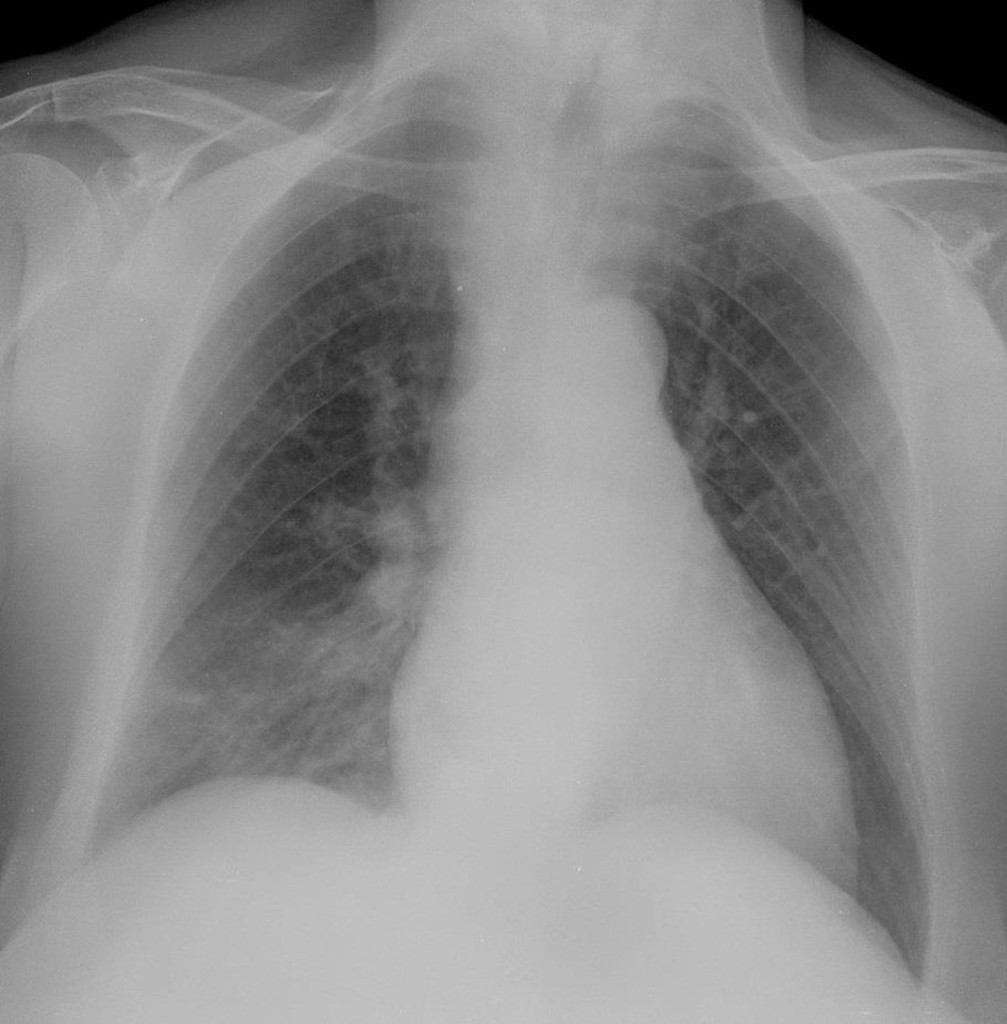

In [ ]:
# path_image = path+'train/'+train_data['filename'][0]
# #haha = 
# Image.open(path_image).convert("RGB")
# #haha.size

In [ ]:
train_dataset = DataPreprocess(train_data)

100%|██████████| 250/250 [00:56<00:00,  4.45it/s]


In [ ]:
tryhaha = train_dataset['image']
print(np.array(tryhaha[0]).shape)

train_dataset['label'].to_numpy().shape
#len(train_dataset['image'][0])/128

(16384,)


(250,)

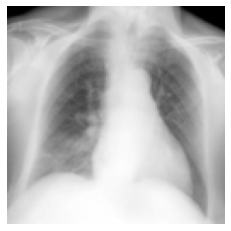

In [ ]:
# img = np.array(train_dataset['image'][0]).reshape(128,128)
# plt.axis('off')
# plt.imshow(img, cmap=plt.cm.gray)

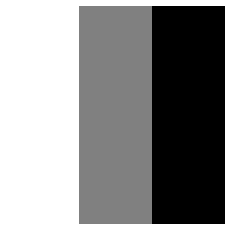

In [ ]:
# edges_prewitt_vertical = prewitt_v(img)
# kernal3 = np.asanyarray(np.array([[1,0,-1],[1,0,-1],[1 ,0 ,-1]]))
# plt.axis('off')
# plt.imshow(kernal3, cmap=plt.cm.gray)

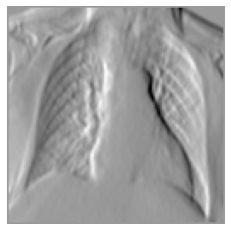

In [ ]:
# plt.axis('off')
# plt.imshow(edges_prewitt_vertical, cmap=plt.cm.gray) 

In [ ]:
test_dataset = DataPreprocess(test_data,train_status=False)

100%|██████████| 94/94 [00:04<00:00, 23.04it/s]


In [ ]:
test_dataset

,image,gender,age,country
0,"[0.10195059, 0.10195059, 0.10195059, 0.1019505...",0,-1,4
1,"[0.1176353, 0.12547766, 0.16861059, 0.21174355...",0,30,25
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,-1,4
3,"[0.12042668, 0.096899614, 0.08396392, 0.087885...",0,73,-1
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,51,0
...,...,...,...,...
89,"[0.031369414, 0.031369414, 0.03529059, 0.03529...",-1,-1,-1
90,"[0.3019306, 0.29800943, 0.3058518, 0.3176153, ...",1,70,0
91,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,45,6
92,"[0.039211765, 0.039211765, 0.039211765, 0.0392...",0,55,13


In [ ]:
#save preprocess data set
train_dataset.to_csv(path_or_buf=path+'train_Qa.csv',index=False)
#train_try = pd.read_csv(path+'train_Qa.csv')
#train_try
test_dataset.to_csv(path_or_buf=path+'test_Qa.csv',index=False)
#test_try = pd.read_csv(path+'test_Qa.csv')
#test_try

In [ ]:
image_size = 128
tryhaha = pd.read_csv(path+'train_Qa.csv')
#tryhaha['image'][0][1:-1].split(', ')
image = np.array(list(map(float,tryhaha['image'][0][1:-1].split(', ')))).reshape(image_size,image_size)
print(image)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.60778236 0.6117036  0.61954594 ... 0.51367414 0.509753   0.50583184]
 [0.6117036  0.61954594 0.62738824 ... 0.5254377  0.51759535 0.509753  ]
 [0.6156247  0.6234671  0.62738824 ... 0.5254377  0.5215165  0.5215165 ]]


#Problem (b.i)

In [ ]:
#importing required libraries
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import numpy as np

#from skimage.transform import resize
from skimage.transform import rescale
from skimage.feature import hog
#from skimage import exposure

from skimage.filters import prewitt_h,prewitt_v

from scipy import ndimage as ndi
from skimage.filters import gabor_kernel
%matplotlib inline

def PlotFunc(image_ker,image_org,image_fea,kernal_name):
  image_kernal_rescaled = rescale(np.real(image_ker), 128/image_ker.shape[0], anti_aliasing=False)
  fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True) 
  #kernel
  ax1.axis('off')
  ax1.imshow(image_kernal_rescaled, cmap=plt.cm.gray)
  ax1.set_title(kernal_name,fontsize=11)
  
  #orgnal image  
  ax2.axis('off')
  ax2.imshow(image_org, cmap=plt.cm.gray) 
  ax2.set_title('Input image',fontsize=11)
  
  # Rescale histogram for better display 
  #hog_image_rescaled = image_fea#exposure.rescale_intensity(hog_image, in_range=(0, 1))
  ax3.axis('off')
  ax3.imshow(image_fea, cmap=plt.cm.gray) 
  ax3.set_title('Output feature',fontsize=11)
  plt.show()

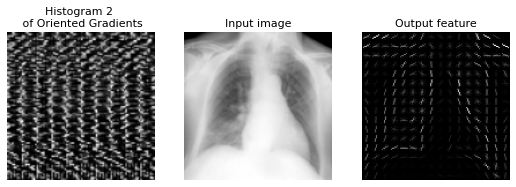

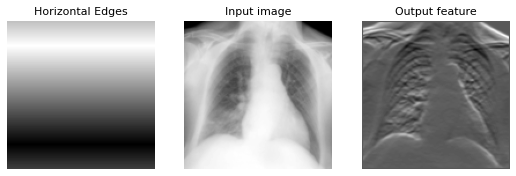

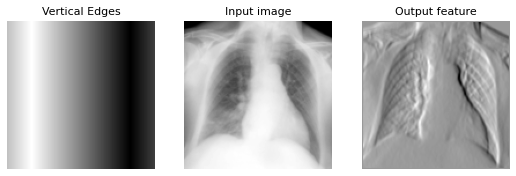

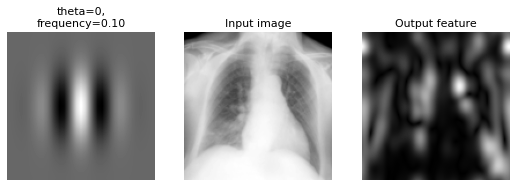

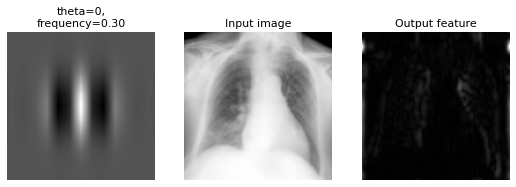

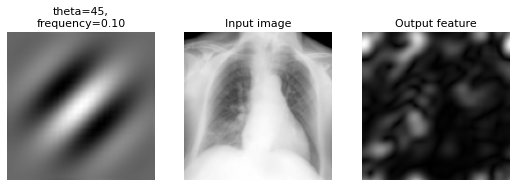

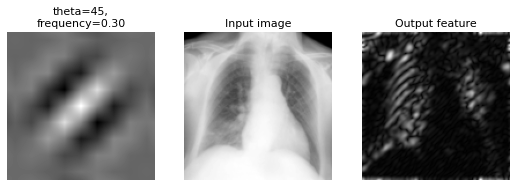

In [ ]:
img = np.array(train_dataset['image'][0]).reshape(image_size,image_size)

#img = np.asanyarray(train_dataset['image'][0])

#feature 1 hog2:Histogram of Oriented Gradients
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), block_norm='L2-Hys',
                    cells_per_block=(2, 2), visualize=True, multichannel=False)

kernal1 = np.asanyarray(np.array(fd).reshape((90,90)))
PlotFunc(kernal1,img,hog_image,'Histogram 2 \n of Oriented Gradients')


#feature 2 prewitt_h
#calculating horizontal edges using prewitt kernel
# 1   1  1
# 0   0  0
#-1  -1  -1
edges_prewitt_horizontal = prewitt_h(img)
kernal2 = np.asanyarray(np.array([[1,1,1],[0,0,0],[-1 ,-1 ,-1]]))

PlotFunc(kernal2,img,edges_prewitt_horizontal,'Horizontal Edges')


#feature 3 prewitt_v
#calculating vertical edges using prewitt kernel
# 1   0  -1
# 1   0  -1
# 1   0  -1
edges_prewitt_vertical = prewitt_v(img)
kernal3 = np.asanyarray(np.array([[1,0,-1],[1,0,-1],[1 ,0 ,-1]]))
PlotFunc(kernal3,img,edges_prewitt_vertical,'Vertical Edges')

#feature 4-7
def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(ndi.convolve(image, np.real(kernel), mode='wrap')**2 +
                   ndi.convolve(image, np.imag(kernel), mode='wrap')**2)
# Plot a selection of the filter bank kernels and their responses.
for theta in (0, 1):
    theta = theta / 4. * np.pi
    for frequency in (0.1, 0.3):
        kernel = gabor_kernel(frequency, theta=theta)
        params = 'theta=%d,\nfrequency=%.2f' % (theta * 180 / np.pi, frequency)
        
        PlotFunc(kernel,img,power(img, kernel),params)

In [ ]:
#importing required libraries
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import numpy as np

#from skimage.transform import resize
from skimage.transform import rescale
from skimage.feature import hog
#from skimage import exposure

from skimage.filters import prewitt_h,prewitt_v

from scipy import ndimage as ndi
from skimage.filters import gabor_kernel
%matplotlib inline

def KernelStruct(images,feature):
  def power(image, kernel):
      # Normalize images for better comparison.
      image = (image - image.mean()) / image.std()
      return np.sqrt(ndi.convolve(image, np.real(kernel), mode='wrap')**2 +
                    ndi.convolve(image, np.imag(kernel), mode='wrap')**2)
  def feature47(theta,frequency,images=images):
    theta = theta / 4. * np.pi
    kernel = gabor_kernel(frequency, theta=theta)
    images_feature_mean = []
    images_feature_var = []
    for img in tqdm(images):
      img_tep = np.array(power(img, kernel)).reshape(1,128*128)[0]
      images_feature_mean.append(np.mean(img_tep))
      images_feature_var.append(np.std(img_tep)**2)
    return images_feature_mean,images_feature_var

  #feature 1 hog2:Histogram of Oriented Gradients
  if feature == 1:
    images_feature_mean = []
    images_feature_var = []
    for img in tqdm(images):
      fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), block_norm='L2-Hys',
                    cells_per_block=(2, 2), visualize=True, multichannel=False)
      img_tep = np.array(hog_image).reshape(1,128*128)[0]
      images_feature_mean.append(np.mean(img_tep))
      images_feature_var.append(np.std(img_tep)**2)
      #images_feature.append(list(img_tep))

  #feature 2 prewitt_h
  #calculating horizontal edges using prewitt kernel
  # 1   1  1
  # 0   0  0
  #-1  -1  -1
  elif feature ==2:
    images_feature_mean = []
    images_feature_var = []
    for img in tqdm(images):
      edges_prewitt_horizontal = prewitt_h(img)
      img_tep = np.array(edges_prewitt_horizontal).reshape(1,128*128)[0]
      images_feature_mean.append(np.mean(img_tep))
      images_feature_var.append(np.std(img_tep)**2)
      #images_feature.append(list(img_tep))

  #feature 3 prewitt_v
  #calculating vertical edges using prewitt kernel
  # 1   0  -1
  # 1   0  -1
  # 1   0  -1
  elif feature ==3:
    images_feature_mean = []
    images_feature_var = []
    for img in tqdm(images):
      edges_prewitt_vertical = prewitt_v(img)
      img_tep = np.array(edges_prewitt_vertical).reshape(1,128*128)[0]
      images_feature_mean.append(np.mean(img_tep))
      images_feature_var.append(np.std(img_tep)**2)
      #images_feature.append(list(img_tep))
  
  elif feature ==4:
    theta = 0
    frequency = 0.1
    images_feature_mean,images_feature_var = feature47(theta,frequency,images=images)

  elif feature ==5:
    theta = 0
    frequency = 0.3
    images_feature_mean,images_feature_var = feature47(theta,frequency,images=images)

  elif feature ==6:
    theta = 1
    frequency = 0.1
    images_feature_mean,images_feature_var = feature47(theta,frequency,images=images)

  elif feature ==7:
    theta = 1
    frequency = 0.3
    images_feature_mean,images_feature_var = feature47(theta,frequency,images=images)
  else:
    print('False: please select feature from 1-7')
    return False
  
  return np.array(images_feature_mean),np.array(images_feature_var)
#  return images_feature#np.array(images_feature)

In [ ]:
train_dataset_feature = [np.array(train_dataset['image'][i]).reshape(image_size,image_size) for i in range(len(train_dataset))]
test_dataset_feature = [ np.array(test_dataset['image'][i]).reshape(image_size,image_size) for i in range(len(test_dataset))]

In [ ]:
#train_feature_mean=[]
#train_feature_var=[]

train_feature_pd = pd.DataFrame()
for i in range(7):
  print(i+1)
  feature_mean,feature_var = KernelStruct(train_dataset_feature,i+1)
  train_feature_pd['feature{} mean'.format(i+1)]   = feature_mean#.tolist()
  train_feature_pd['feature{} var'.format(i+1)]   = feature_var#.tolist()

  #train_feature.append(feature)

train_feature_pd['label'] = train_dataset['label']


  1%|          | 2/250 [00:00<00:13, 17.92it/s]

1



100%|██████████| 250/250 [00:13<00:00, 18.59it/s]

100%|██████████| 250/250 [00:00<00:00, 2606.82it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

2
3



100%|██████████| 250/250 [00:00<00:00, 2058.70it/s]

  0%|          | 1/250 [00:00<00:28,  8.75it/s]

4



100%|██████████| 250/250 [00:29<00:00,  8.39it/s]

  4%|▍         | 11/250 [00:00<00:02, 102.43it/s]

5



100%|██████████| 250/250 [00:02<00:00, 103.40it/s]

  1%|          | 2/250 [00:00<00:14, 17.48it/s]

6



100%|██████████| 250/250 [00:12<00:00, 19.35it/s]

  8%|▊         | 21/250 [00:00<00:01, 207.48it/s]

7



100%|██████████| 250/250 [00:01<00:00, 212.39it/s]


In [ ]:
train_feature_pd

,feature1 mean,feature1 var,feature2 mean,feature2 var,feature3 mean,feature3 var,feature4 mean,feature4 var,feature5 mean,feature5 var,feature6 mean,feature6 var,feature7 mean,feature7 var,label
0,0.003182,0.000080,0.006042,0.000789,0.000104,0.001176,0.034923,0.000899,0.009874,0.000235,0.021373,0.000486,0.007916,0.000073,1
1,0.002566,0.000034,0.008470,0.000680,-0.001070,0.000307,0.020684,0.000372,0.008753,0.000170,0.021785,0.000358,0.009533,0.000100,1
2,0.004979,0.000160,0.006001,0.002563,-0.001150,0.002216,0.028529,0.000875,0.010823,0.000185,0.018409,0.000251,0.008948,0.000137,0
3,0.003747,0.000071,0.005906,0.001226,-0.000424,0.001152,0.035667,0.000558,0.018075,0.001075,0.035277,0.000932,0.017600,0.000533,1
4,0.012029,0.000665,0.004707,0.008398,-0.000344,0.015332,0.126109,0.011896,0.040165,0.002600,0.053366,0.002011,0.023326,0.000529,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.003640,0.000067,0.004157,0.000959,0.000135,0.001442,0.047364,0.001844,0.015782,0.000342,0.022539,0.000386,0.011860,0.000192,1
246,0.005429,0.000168,0.005643,0.002387,-0.001611,0.003057,0.051028,0.002484,0.016021,0.000554,0.038319,0.001456,0.013946,0.000230,1
247,0.003941,0.000106,0.007537,0.001895,-0.001013,0.001276,0.025100,0.000699,0.012283,0.000539,0.019152,0.000331,0.009775,0.000153,0
248,0.005010,0.000118,0.006568,0.001265,0.004680,0.003818,0.057213,0.003446,0.035695,0.007415,0.031524,0.000705,0.014335,0.000170,0


In [ ]:
#test_feature=[]

test_feature_pd = pd.DataFrame()
for i in range(7):
  print(i+1)
  feature_mean,feature_var = KernelStruct(test_dataset_feature,i+1)
  test_feature_pd['feature{} mean'.format(i+1)]   = feature_mean#.tolist()
  test_feature_pd['feature{} var'.format(i+1)]   = feature_var#.tolist()

  #test_feature.append(feature)
#test_feature_pd['label'] = test_dataset['label']


  2%|▏         | 2/94 [00:00<00:04, 18.59it/s]

1



100%|██████████| 94/94 [00:05<00:00, 18.17it/s]

100%|██████████| 94/94 [00:00<00:00, 1999.09it/s]

100%|██████████| 94/94 [00:00<00:00, 1622.49it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

2
3
4



100%|██████████| 94/94 [00:11<00:00,  8.41it/s]

 12%|█▏        | 11/94 [00:00<00:00, 101.47it/s]

5



100%|██████████| 94/94 [00:00<00:00, 102.93it/s]

  3%|▎         | 3/94 [00:00<00:04, 20.36it/s]

6



100%|██████████| 94/94 [00:04<00:00, 19.48it/s]

 24%|██▍       | 23/94 [00:00<00:00, 223.85it/s]

7



100%|██████████| 94/94 [00:00<00:00, 207.39it/s]


In [ ]:
train_feature_pd.to_csv(path_or_buf=path+'train_Qb1.csv',index=False)
#train_try = pd.read_csv(path+'train_Qa.csv')
#train_try
test_feature_pd.to_csv(path_or_buf=path+'test_Qb1.csv',index=False)

In [ ]:
image_size = 128
tryhaha = pd.read_csv(path+'test_Qb1.csv')
print(tryhaha['feature1 var'])
#image = np.array(list(map(float,tryhaha['image'][0][1:-1].split(', ')))).reshape(image_size,image_size)
#print(image)

0     0.000032
1     0.000257
2     0.000249
3     0.000132
4     0.000118
        ...   
89    0.000090
90    0.000026
91    0.000175
92    0.000187
93    0.000212
Name: feature1 var, Length: 94, dtype: float64
